In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('./car_data.csv')

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
df.drop(["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"], axis = 1, inplace = True)

In [7]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [8]:
df.columns = ['Make', 'Model', 'Year', 'Hp', 'Cylinders', 'Transmission', 'Drive_Mode', 'MPG_H', 'MPG_C', 'Price']

In [9]:
df.head()

,Make,Model,Year,Hp,Cylinders,Transmission,Drive_Mode,MPG_H,MPG_C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [10]:
df[df.duplicated()]

,Make,Model,Year,Hp,Cylinders,Transmission,Drive_Mode,MPG_H,MPG_C,Price
14,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,28,19,31500
18,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,2000
20,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,2000
24,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,24,17,2000
25,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,24,17,2000
...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,95.0,4.0,MANUAL,four wheel drive,26,22,2000
11603,Volvo,XC60,2017,302.0,4.0,AUTOMATIC,all wheel drive,29,20,46350
11604,Volvo,XC60,2017,240.0,4.0,AUTOMATIC,front wheel drive,30,23,40950
11708,Suzuki,XL7,2008,252.0,6.0,AUTOMATIC,all wheel drive,22,15,29149


# QUESTIONS
## QUEST 1
#### Remove duplicates

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.head()

,Make,Model,Year,Hp,Cylinders,Transmission,Drive_Mode,MPG_H,MPG_C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## Quest 2
#### Identify the categorical and the numerical features in the dataset

In [13]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)


Categorical Features: ['Make', 'Model', 'Transmission', 'Drive_Mode']
Numerical Features: ['Year', 'Hp', 'Cylinders', 'MPG_H', 'MPG_C', 'Price']


## Quest 3
#### Identify the columns which have missing values and impute them accordingly.

In [17]:
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", columns_with_missing_values)

# Impute missing values
for column in columns_with_missing_values:
    if df[column].dtype == 'category':
        # For categorical columns, fill missing values with the most frequent value
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # For numerical columns, fill missing values with the mean
        df[column].fillna(df[column].mean(), inplace=True)


Columns with missing values: []


## Quest 4
#### Identify the outliers in the price column using IQR technique and create a column called is_outlier to clearly flag the outliers without dropping them from the dataset.

In [18]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

#Lower and Upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#New column 'is_outlier' to flag outliers
df['is_outlier'] = ((df['Price'] < lower_bound) | (df['Price'] > upper_bound)).astype(int)

# Displaying the flagged outliers
outliers = df[df['is_outlier'] == 1]
print(outliers)

# Saving the modified DataFrame to a new CSV file
df.to_csv('car_data_with_outliers_flagged.csv', index=False)


           Make Model  Year     Hp  Cylinders      Transmission  \
294     Ferrari   360  2002  400.0        8.0            MANUAL   
295     Ferrari   360  2002  400.0        8.0            MANUAL   
296     Ferrari   360  2002  400.0        8.0  AUTOMATED_MANUAL   
297     Ferrari   360  2002  400.0        8.0  AUTOMATED_MANUAL   
298     Ferrari   360  2003  400.0        8.0            MANUAL   
...         ...   ...   ...    ...        ...               ...   
11736  Cadillac   XLR  2008  320.0        8.0         AUTOMATIC   
11737  Cadillac   XLR  2009  320.0        8.0         AUTOMATIC   
11903       BMW    Z8  2001  394.0        8.0            MANUAL   
11904       BMW    Z8  2002  394.0        8.0            MANUAL   
11905       BMW    Z8  2003  394.0        8.0            MANUAL   

             Drive_Mode  MPG_H  MPG_C   Price  is_outlier  
294    rear wheel drive     15     10  160829           1  
295    rear wheel drive     15     10  140615           1  
296    rear whe

## Quet 5
#### Standardize the numerical columns either using Min-Max or Standard scaling method.

In [20]:
#Min-Max
from sklearn.preprocessing import MinMaxScaler
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print(df.head())


  Make       Model      Year        Hp  Cylinders Transmission  \
0  BMW  1 Series M  0.777778  0.295983      0.375       MANUAL   
1  BMW    1 Series  0.777778  0.258985      0.375       MANUAL   
2  BMW    1 Series  0.777778  0.258985      0.375       MANUAL   
3  BMW    1 Series  0.777778  0.184989      0.375       MANUAL   
4  BMW    1 Series  0.777778  0.184989      0.375       MANUAL   

         Drive_Mode     MPG_H     MPG_C     Price  is_outlier  
0  rear wheel drive  0.040936  0.092308  0.021384         0.0  
1  rear wheel drive  0.046784  0.092308  0.018727         0.0  
2  rear wheel drive  0.046784  0.100000  0.016643         0.0  
3  rear wheel drive  0.046784  0.084615  0.013300         0.0  
4  rear wheel drive  0.046784  0.084615  0.015747         0.0  


In [23]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print(df.head())

  Make       Model      Year        Hp  Cylinders Transmission  \
0  BMW  1 Series M  0.011703  0.736622   0.184652       MANUAL   
1  BMW    1 Series  0.011703  0.416751   0.184652       MANUAL   
2  BMW    1 Series  0.011703  0.416751   0.184652       MANUAL   
3  BMW    1 Series  0.011703 -0.222991   0.184652       MANUAL   
4  BMW    1 Series  0.011703 -0.222991   0.184652       MANUAL   

         Drive_Mode     MPG_H     MPG_C     Price  is_outlier  
0  rear wheel drive -0.072501 -0.083248  0.058636   -0.307895  
1  rear wheel drive  0.148966 -0.083248 -0.029759   -0.307895  
2  rear wheel drive  0.148966  0.024754 -0.099058   -0.307895  
3  rear wheel drive  0.148966 -0.191250 -0.210257   -0.307895  
4  rear wheel drive  0.148966 -0.191250 -0.128872   -0.307895  


## Quest 6
### Plot histogram of Car make with its frequency

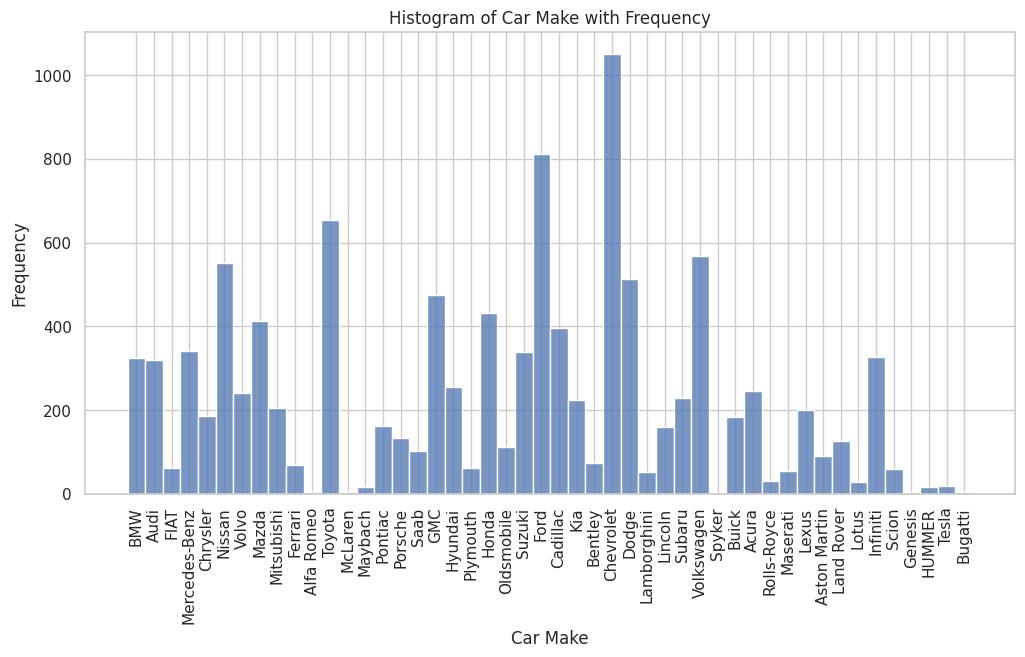

In [29]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Make', palette='viridis', discrete=True)
plt.xticks(rotation=90)
plt.title('Histogram of Car Make with Frequency')
plt.xlabel('Car Make')
plt.ylabel('Frequency')
plt.show()



#### Heat Maps is a type of plot which is necessary when we need to find the dependent variables.
## Quest 7
#### Create a heat map of all numerical columns

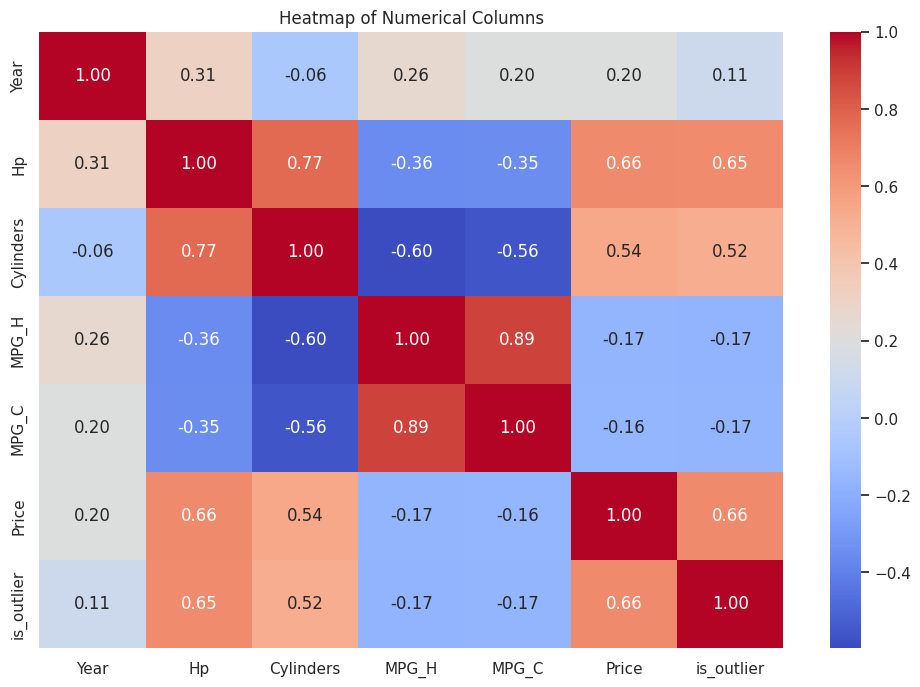

In [28]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Numerical Columns')
plt.show()



#### Scatterplot : We generally use scatter plots to find the correlation between two variables
## Quest 8
#### Create scatterplot between HP and Price

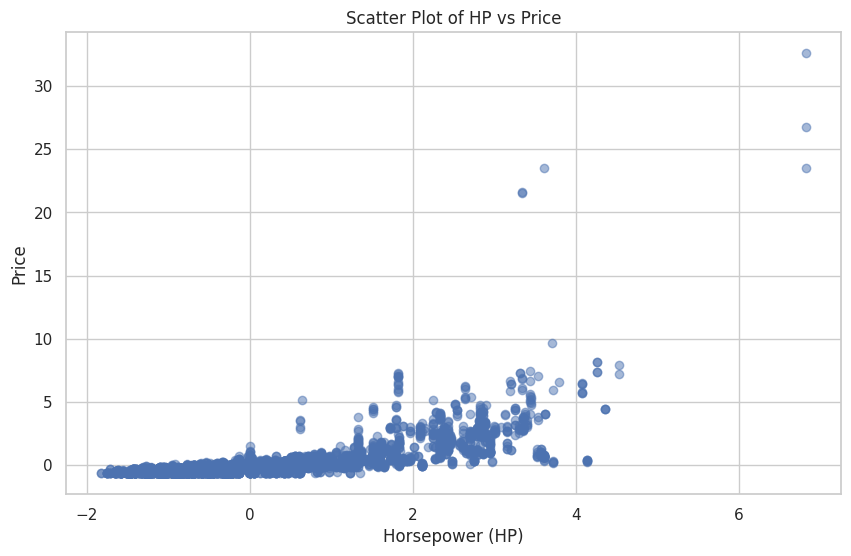

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Hp'], df['Price'], alpha=0.5)
plt.title('Scatter Plot of HP vs Price')
plt.xlabel('Horsepower (HP)')
plt.ylabel('Price')
plt.grid(True)
plt.show()


## Quest 6
#### Create new features by transforming the following columns -

#### #	Feature	Transformation	Feature type
#### 1.	price	Log	Numerical
#### 2.	city_mpg	BoxCox	Numerical
#### 3.	make	One-hot encoding	Categorical


In [30]:
import numpy as np

# Performing logarithmic transformation on 'Price' column
df['price_log'] = np.log(df['Price'])


In [36]:
from scipy.stats import boxcox
constant = df['MPG_C'].min() - 1
df['MPG_C_positive'] = df['MPG_C'] - constant
df['MPG_C_boxcox'], _ = boxcox(df['MPG_C_positive'])
df.drop('MPG_C_positive', axis=1, inplace=True)


In [32]:
# Performing one-hot encoding on 'Make' column
df = pd.get_dummies(df, columns=['Make'], prefix='Make')

In [37]:
df.head()

,Model,Year,Hp,Cylinders,Transmission,Drive_Mode,MPG_H,MPG_C,Price,is_outlier,...,Make_Saab,Make_Scion,Make_Spyker,Make_Subaru,Make_Suzuki,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,MPG_C_boxcox
0,1 Series M,0.011703,0.736622,0.184652,MANUAL,rear wheel drive,-0.072501,-0.083248,0.058636,-0.307895,...,False,False,False,False,False,False,False,False,False,0.568201
1,1 Series,0.011703,0.416751,0.184652,MANUAL,rear wheel drive,0.148966,-0.083248,-0.029759,-0.307895,...,False,False,False,False,False,False,False,False,False,0.568201
2,1 Series,0.011703,0.416751,0.184652,MANUAL,rear wheel drive,0.148966,0.024754,-0.099058,-0.307895,...,False,False,False,False,False,False,False,False,False,0.588077
3,1 Series,0.011703,-0.222991,0.184652,MANUAL,rear wheel drive,0.148966,-0.191250,-0.210257,-0.307895,...,False,False,False,False,False,False,False,False,False,0.546381
4,1 Series,0.011703,-0.222991,0.184652,MANUAL,rear wheel drive,0.148966,-0.191250,-0.128872,-0.307895,...,False,False,False,False,False,False,False,False,False,0.546381
